In [1]:
import scanpy as sc
import os 

In [2]:
integration_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata"

myeloid_transfer_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/LabelTransfer/adatas"

fibro_transfer_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/LabelTransfer/adatas/Fibroblast"


In [3]:
full_adata_fname = os.path.join(integration_dir,"adata_scanvi_predictions.h5ad" ) 

myeloid_adata_fname = os.path.join(myeloid_transfer_dir,"myeloid_scanvi_refined.h5ad" )


fibro_adata_fname = os.path.join(fibro_transfer_dir,"fibro_scanvi_refined.h5ad" )


In [4]:
full_adata = sc.read_h5ad(full_adata_fname)
myeloid_adata =  sc.read_h5ad(myeloid_adata_fname)
fibro_adata =  sc.read_h5ad(fibro_adata_fname)

In [5]:
full_adata.obs_keys()

['sample',
 'n_genes_by_counts',
 'total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_mt',
 'pct_counts_mt',
 'complexity',
 'doublet_scores',
 'predicted_doublets',
 'n_genes',
 'n_counts',
 'celltypist_labels_Immune_All_High',
 'celltypist_scores_Immune_All_High',
 'celltypist_labels_Cells_Adult_Breast',
 'celltypist_scores_Cells_Adult_Breast',
 'batch',
 'subtype',
 'leiden',
 'celltypist_labels_Immune_All_High_highconf',
 'GenAnno',
 'GenAnnoV1',
 'GenAnnoV2',
 'celltypist_mapped',
 'GenAnnoHighConf',
 'cell_type',
 'predicted_labels',
 'GennAnno_ScAnvi']

Prepare full adata to recieve the label transfer annotations

In [7]:
full_adata.obs['LabelTransferAnno'] =  full_adata.obs.GennAnno_ScAnvi
full_adata.obs['LabelTransferAnno'] = full_adata.obs['LabelTransferAnno'].astype(str)

In [10]:
myeloid_adata.obs.scanvi_post_scarches_pred_label = myeloid_adata.obs.scanvi_post_scarches_pred_label.astype(str)
fibro_adata.obs.scanvi_post_scarches_pred_label = fibro_adata.obs.scanvi_post_scarches_pred_label.astype(str)


In [11]:
common_cells_myeloid = full_adata.obs_names.intersection(myeloid_adata.obs_names)
common_cells_fibro = full_adata.obs_names.intersection(fibro_adata.obs_names)

In [12]:
common_cells_myeloid

Index(['AAACCTGAGAAACCGC-1-PM0337-', 'AAACCTGAGACCCACC-1-PM0337-',
       'AAACGGGAGGTGTTAA-1-PM0337-', 'AAACGGGTCCTGCAGG-1-PM0337-',
       'AAAGATGAGCAGGCTA-1-PM0337-', 'AAAGATGCAAACCCAT-1-PM0337-',
       'AAAGATGCAGCCTTTC-1-PM0337-', 'AAAGATGTCGCATGGC-1-PM0337-',
       'AAAGCAAAGATCCTGT-1-PM0337-', 'AAAGCAAAGCCACCTG-1-PM0337-',
       ...
       'TTGAACGAGAATTGTG-1-MH0126-', 'TTGACTTTCATGTAGC-1-MH0126-',
       'TTGCCGTCAACGATCT-1-MH0126-', 'TTGCCGTTCTGCGACG-1-MH0126-',
       'TTGCGTCCACATAACC-1-MH0126-', 'TTGCGTCTCCAAAGTC-1-MH0126-',
       'TTGGAACCAATGTTGC-1-MH0126-', 'TTTATGCCACAGGCCT-1-MH0126-',
       'TTTGTCAAGAAACGCC-1-MH0126-', 'TTTGTCACACGTGAGA-1-MH0126-'],
      dtype='object', length=14380)

In [13]:
common_cells_fibro

Index(['AAACGGGCATGTCTCC-1-PM0337-', 'AAATGCCTCACTCCTG-1-PM0337-',
       'AACACGTCATGCCTTC-1-PM0337-', 'AACTCAGAGAATCTCC-1-PM0337-',
       'AACTCTTTCCCTAATT-1-PM0337-', 'AACTGGTGTATATGAG-1-PM0337-',
       'AACTTTCCATGACATC-1-PM0337-', 'AAGGTTCCAGACAGGT-1-PM0337-',
       'AATCCAGAGGGCTTGA-1-PM0337-', 'ACACCCTAGATGTCGG-1-PM0337-',
       ...
       'TTAGTTCGTCCAGTGC-1-MH0126-', 'TTAGTTCGTGCTCTTC-1-MH0126-',
       'TTAGTTCTCGTATCAG-1-MH0126-', 'TTCTACAAGCGATTCT-1-MH0126-',
       'TTCTCAACATGCAACT-1-MH0126-', 'TTGACTTCAGCCACCA-1-MH0126-',
       'TTGCGTCAGCAGATCG-1-MH0126-', 'TTGCGTCAGCCGCCTA-1-MH0126-',
       'TTTATGCGTTCGGCAC-1-MH0126-', 'TTTCCTCTCAGCACAT-1-MH0126-'],
      dtype='object', length=10481)

In [14]:
full_adata.obs.loc[common_cells_myeloid, "LabelTransferAnno"] = myeloid_adata.obs.loc[common_cells_myeloid, "scanvi_post_scarches_pred_label"]
full_adata.obs.loc[common_cells_fibro, "LabelTransferAnno"] = fibro_adata.obs.loc[common_cells_fibro, "scanvi_post_scarches_pred_label"]

In [16]:
full_adata.obs.LabelTransferAnno.value_counts()

Epithelial           71320
Cycling cells        26075
T cells              19015
Plasma cells          5067
B cells               3497
unknown               3099
mCAF                  3030
Endothelial           2484
iCAF                  1734
apCAF                 1587
Mac_AgPres            1293
Mac_LA                1046
Mac_Angio             1046
RTM_LA                 991
Mac_IFN                949
vCAF                   862
tpCAF                  789
RTM_IM                 779
Mac_Rec                721
Mac_Hypo               700
RTM_IFN                676
pDC                    605
breast_normal          567
Pericyte               546
IDO_CAF                517
cDC2_AREG              496
Mast_cells             385
Mono_IL1B              307
cDC4_FCGR3A            268
cDC_CXCL8              253
MonoInter_CLEC10A      237
MonoInter_CXCL10       216
cDC2_FCER1A            207
cDC2_CD207             206
cDC_LAMP3              176
cDC1_CLEC9A            155
dCAF                   147
c

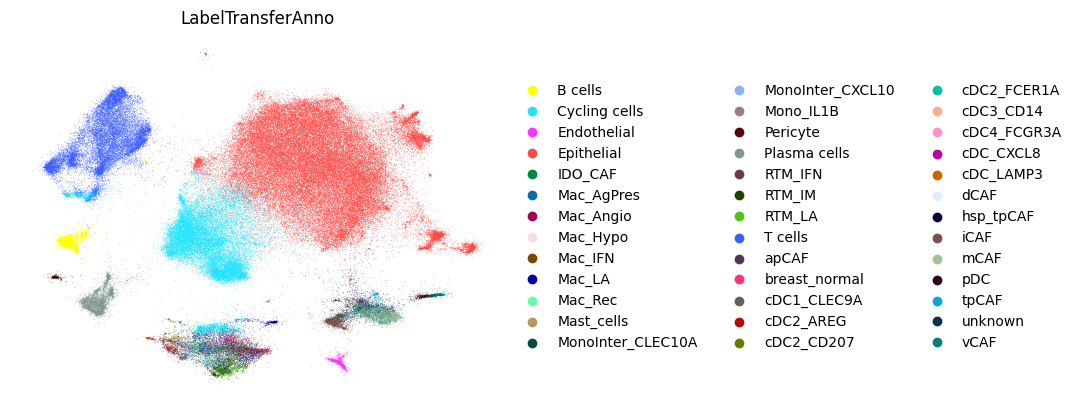

In [17]:
sc.pl.embedding(
    full_adata,
    basis="X_scanvi_MDE",
    color=["LabelTransferAnno"],
    frameon=False,
    ncols=1)

In [18]:
full_fname = os.path.join(myeloid_transfer_dir, "full_adata_post_label_transfer.h5ad")
full_adata.write_h5ad(full_fname)

array(['ER', 'HER2', 'TNBC'], dtype=object)

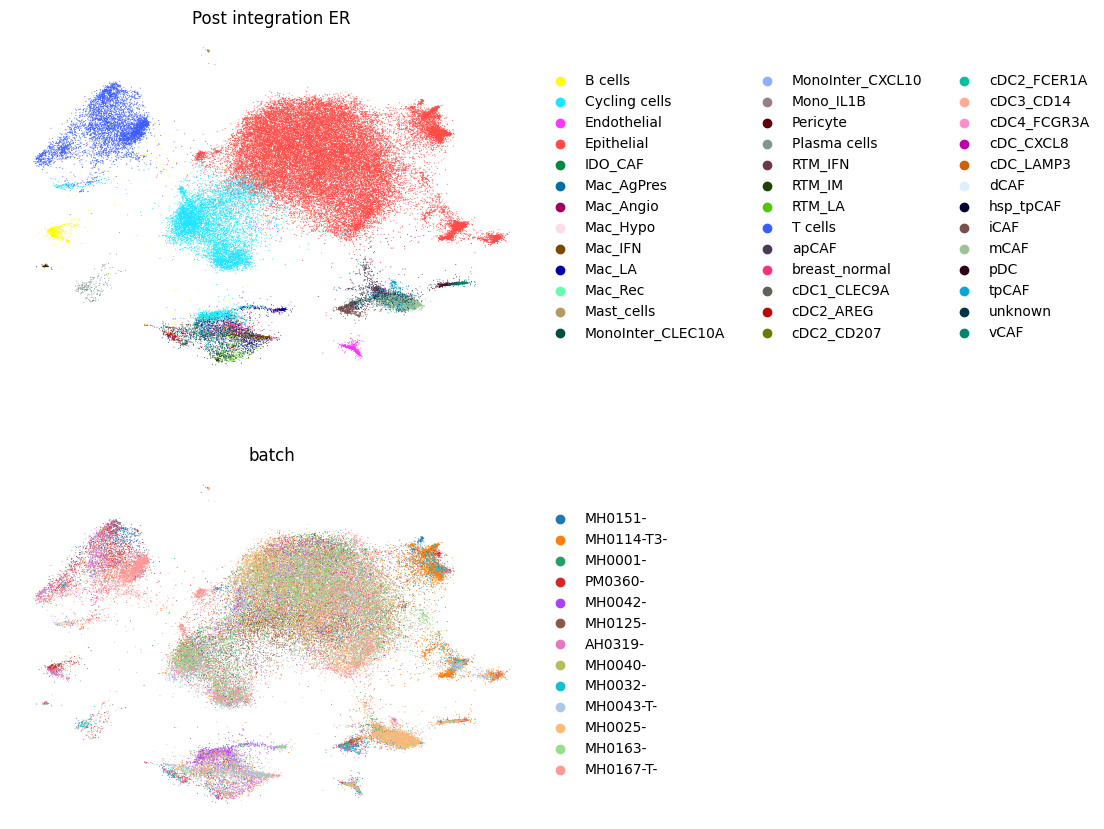

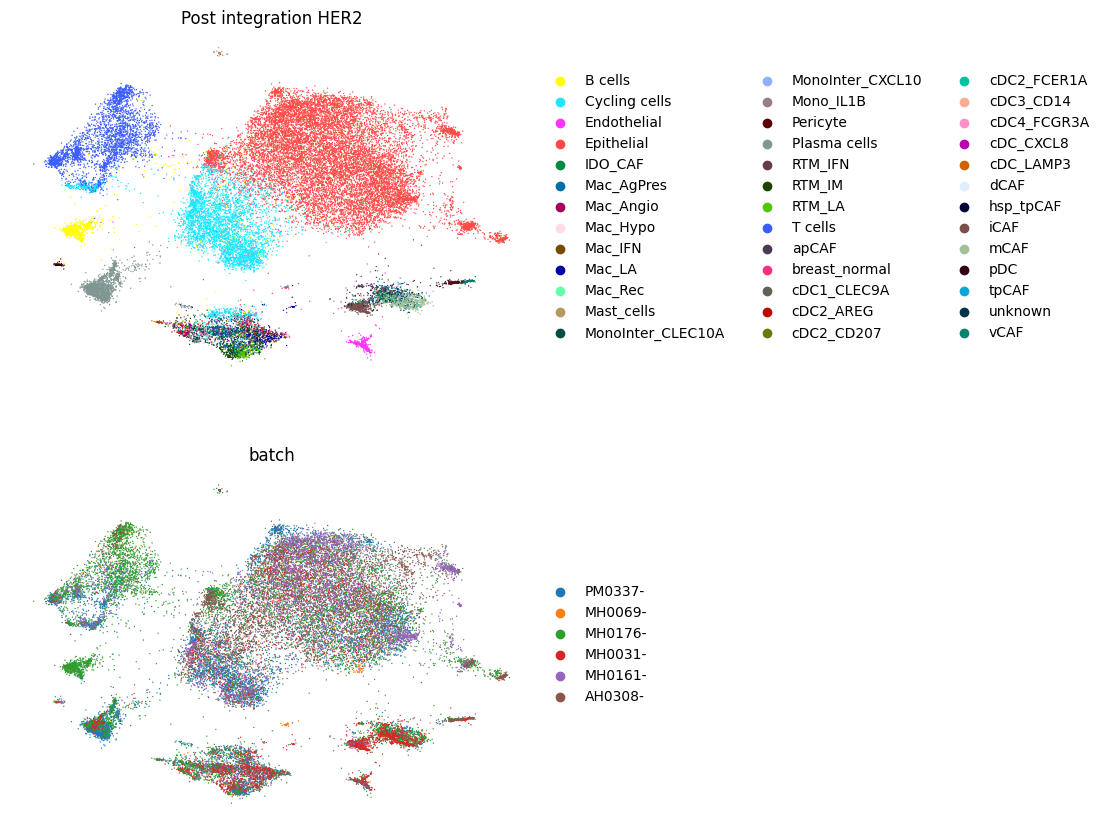

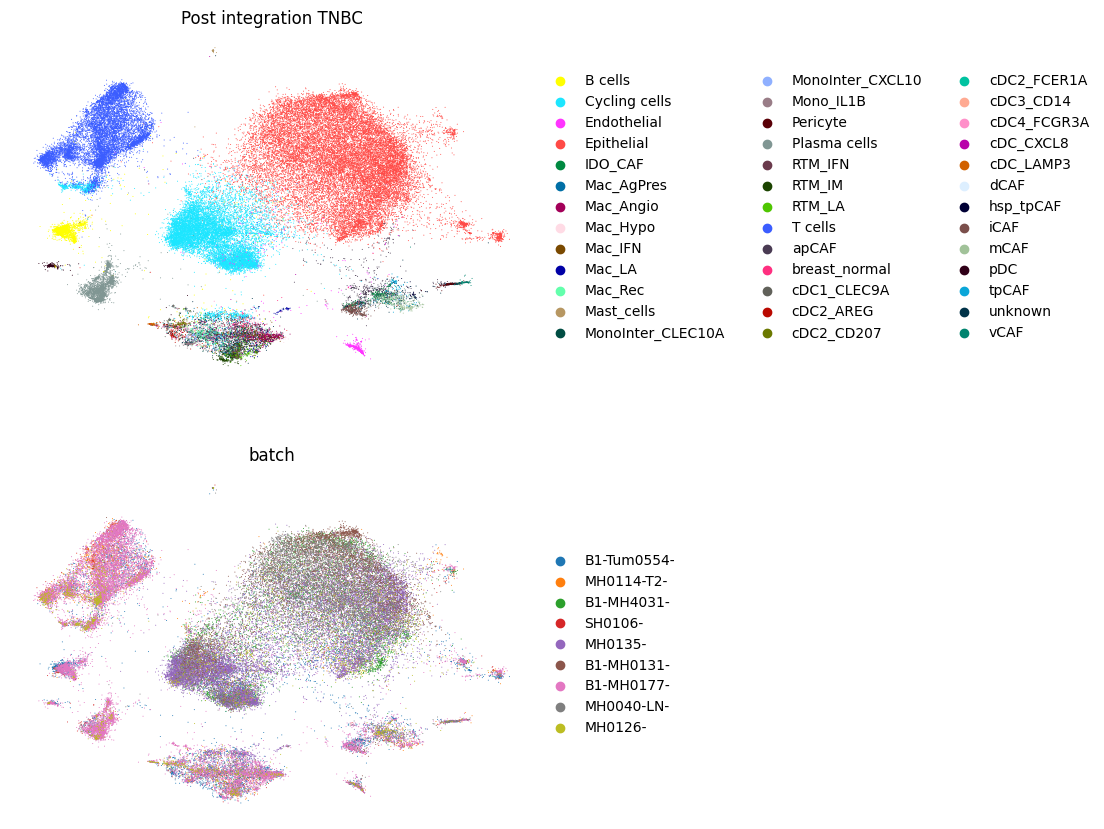

In [26]:
for tumor in full_adata.obs.subtype.cat.categories.values:

    sc.pl.embedding(
        full_adata[full_adata.obs.subtype == tumor, :].copy(),
        basis="X_scanvi_MDE",
        color=["LabelTransferAnno","batch"],
        title = [f"Post integration {tumor}"],
        frameon=False,
        ncols=1)